<a href="https://colab.research.google.com/github/00016668/Machine-Learning-Projects/blob/main/Machine_Learning_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Display the first few rows and basic information
print("Dataset Preview:")
print(df.head())

print("\nDataset Info:")
df.info()

# Check for null values
print("\nNull Values in Each Column:")
print(df.isnull().sum())

Dataset Preview:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----

In [3]:
# Fill missing 'age' with the median value
df['age'].fillna(df['age'].median(), inplace=True)

# Fill missing 'embarked' with the mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Drop 'deck' and 'embark_town' (too many missing or redundant)
df.drop(['deck', 'embark_town'], axis=1, inplace=True)

# Verify no missing values remain
print("\nNull Values After Handling:")
print(df.isnull().sum())



Null Values After Handling:
survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64


<ipython-input-3-d6916d669e38>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
<ipython-input-3-d6916d669e38>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [4]:
from sklearn.preprocessing import LabelEncoder

# Label encode 'sex' and 'embarked'
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])  # 0 = female, 1 = male
df['embarked'] = le.fit_transform(df['embarked'])  # 0 = C, 1 = Q, 2 = S

# Drop redundant columns like 'alive', 'who', 'class'
df.drop(['alive', 'who', 'class', 'adult_male'], axis=1, inplace=True)

print("\nData After Encoding and Dropping Redundant Columns:")
print(df.head())


Data After Encoding and Dropping Redundant Columns:
   survived  pclass  sex   age  sibsp  parch     fare  embarked  alone
0         0       3    1  22.0      1      0   7.2500         2  False
1         1       1    0  38.0      1      0  71.2833         0  False
2         1       3    0  26.0      0      0   7.9250         2   True
3         1       1    0  35.0      1      0  53.1000         2  False
4         0       3    1  35.0      0      0   8.0500         2   True


In [5]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(['survived'], axis=1)
y = df['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)



Training Set Shape: (712, 8)
Testing Set Shape: (179, 8)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred_logictic = model.predict(X_test)

# Evaluate the model
print("\nModel Accuracy:", accuracy_score(y_test, y_pred_logictic))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logictic))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logictic))



Model Accuracy: 0.7988826815642458

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[89 16]
 [20 54]]


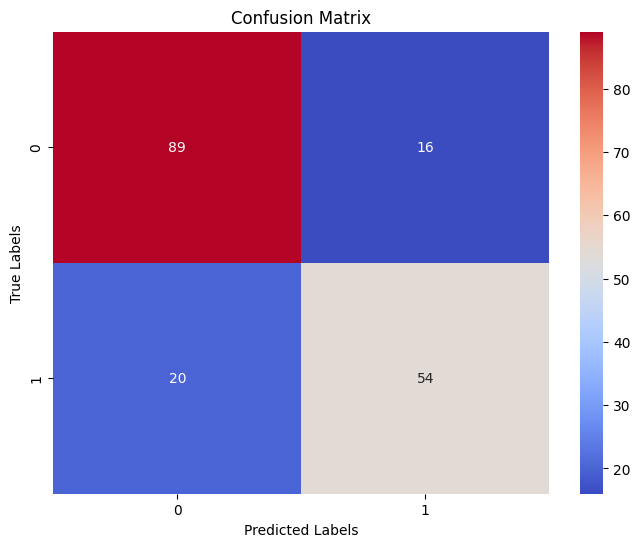

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_logictic), annot=True, fmt='d', cmap='coolwarm', xticklabels=['0','1'], yticklabels=['0','1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_random = rf.predict(X_test)
print(accuracy_score(y_test, y_pred_random))

0.8212290502793296


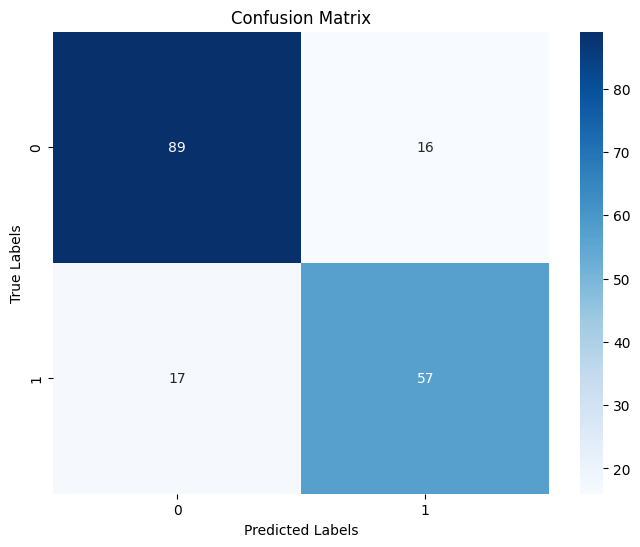

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_random), annot=True, fmt='d', cmap='Blues', xticklabels=['0','1'], yticklabels=['0','1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [15]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print(accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

0.659217877094972
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.76      0.26      0.38        74

    accuracy                           0.66       179
   macro avg       0.70      0.60      0.57       179
weighted avg       0.69      0.66      0.61       179



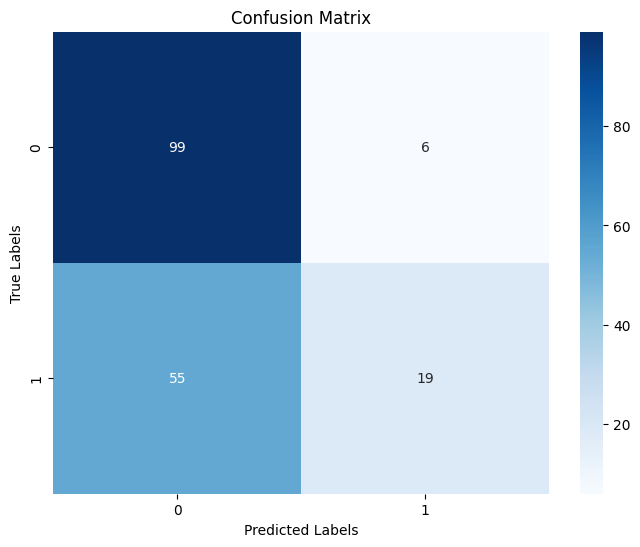

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues', xticklabels=['0','1'], yticklabels=['0','1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

0.7821229050279329
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179



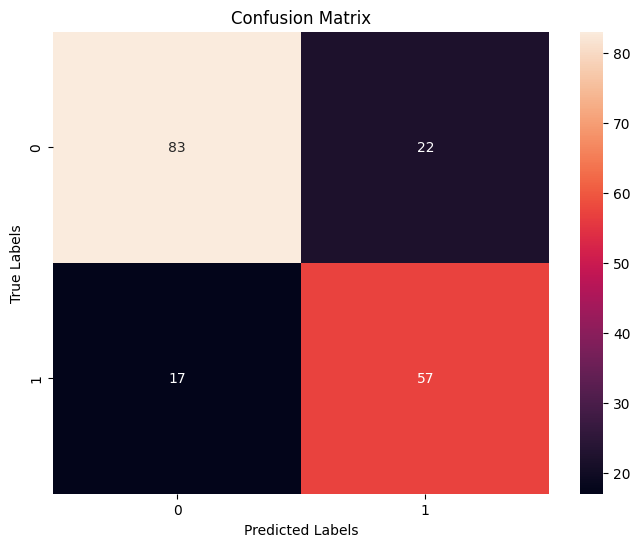

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='rocket', xticklabels=['0','1'], yticklabels=['0','1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.6983240223463687
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       105
           1       0.67      0.53      0.59        74

    accuracy                           0.70       179
   macro avg       0.69      0.67      0.68       179
weighted avg       0.69      0.70      0.69       179



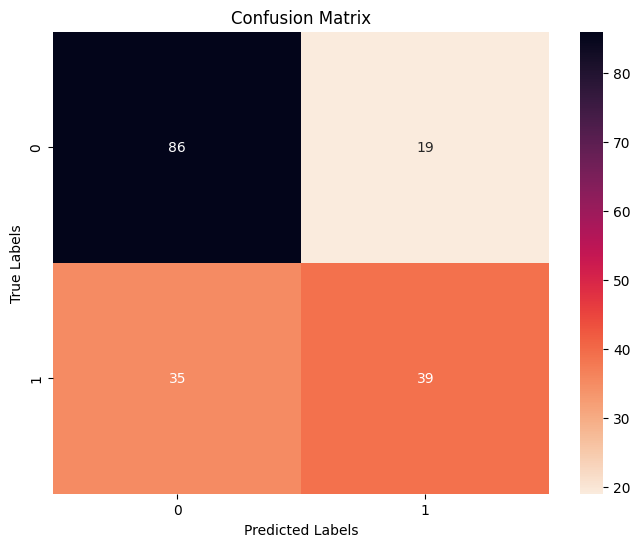

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='rocket_r', xticklabels=['0','1'], yticklabels=['0','1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [22]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print(accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

0.776536312849162
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



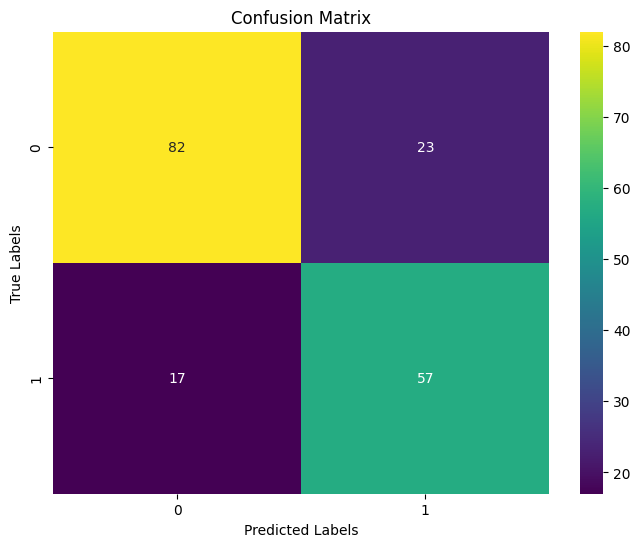

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='viridis', xticklabels=['0','1'], yticklabels=['0','1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [25]:
# overall accuracy table by ML algoritms
data = {'Model': ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'Decision Tree', 'K-Nearest Neighbors', 'Naive Bayes'],
        'Accuracy': [accuracy_score(y_test, y_pred_logictic), accuracy_score(y_test, y_pred_random), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_nb)]}
df_accuracy = pd.DataFrame(data)
df_accuracy.sort_values(by='Accuracy', ascending=False, inplace=True)
df_accuracy.reset_index(drop=True, inplace=True)
df_accuracy

,Model,Accuracy
0,Random Forest,0.815642
1,Logistic Regression,0.798883
2,Decision Tree,0.782123
3,Naive Bayes,0.776536
4,K-Nearest Neighbors,0.698324
5,Support Vector Machine,0.659218


In [26]:
# So here we can see that the highest accuracy score belongs to RandomForest machine learning model